In [1]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import matplotlib

from mpl_toolkits.axes_grid1 import make_axes_locatable
import csv
from scipy import stats
from scipy.fft import fft, fftfreq
import scipy.io
from scipy.io import savemat
from scipy.interpolate import UnivariateSpline 

import os
from datetime import datetime, timedelta
import matplotlib.dates as mdates


import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline


C:\Users\Demag\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
initial_folder = r'C:\Users\Demag\Documents\Comsol sims\Nico'

files = os.listdir(initial_folder)
for i in range(len(files)):
    if ".mph" in files[i]: pass
    else: 
        print(r"[%d]" %(i), '----------->', files[i]) 

[0] -----------> 10_15_added_filter_d2.csv
[1] -----------> 10_16.csv
[2] -----------> 10_16_2.csv
[3] -----------> 1h_1s_50mK_p10_i1_17_11.csv
[4] -----------> 1h_test.csv
[5] -----------> 1_1_05_1h_2nd_run.csv
[6] -----------> 1_1_5_1h_1st_run.csv
[7] -----------> 4h_1s_p10_i1_17_11.csv
[16] -----------> overn_p10_i1_17_11.csv
[17] -----------> P1_I0Dot1.csv
[22] -----------> Test.csv
[23] -----------> TestOverNight14112023.csv
[24] -----------> weekend_50mK_1s_p10_i1.csv


In [8]:
file = files[24]
file_pass = initial_folder+"\\"+file
file1 = open(file_pass, 'r')
lines = file1.readlines()

dict_data=dict()

keys = lines[0].split(',')
print(keys)

file1.close()
data = lines[1:]

date_format = '%H.%M.%S.%f %Y-%m-%d'

time_pid = np.array([])

arr = data[0].split(',')
time_pid = np.append(time_pid, datetime.strptime(arr[0], date_format))
d_old = time_pid[0].day
h_old = time_pid[0].hour

PV = np.array([])
PS = np.array([])
PID1 =np.array([])

am_pm = False # False = PM, True = AM


for i in range(len(data)): 
    arr = data[i].split(',')
    time_pid = np.append(time_pid, datetime.strptime(arr[0], date_format))
    h_now = time_pid[-1].hour
    d_now = time_pid[-1].day
    
    if time_pid[-1].day != d_old: am_pm = True
    else:
        if h_old==11 and time_pid[-2].minute == 59 and time_pid[-2].second == 59: am_pm = False
    
    if am_pm:
        if h_now == 12: time_pid[-1] =  time_pid[-1]  - timedelta(hours=12)
    if not(am_pm):
        if h_now!=12: time_pid[-1] =  time_pid[-1]  + timedelta(hours=12)

    
#     print(time_pid[-1])
    
    h_old = h_now
    d_old = d_now
    
        
    PV = np.append(PV, float(arr[1]))
    PS = np.append(PS, float(arr[2]))
    PID1 = np.append(PID1, float(arr[3]))

time_pid = time_pid[1:]

['DateTime', 'Process Value', 'Process Setpoint', 'PID 1', 'PID 2', 'Setpoint 1', 'Setpoint 2\n']


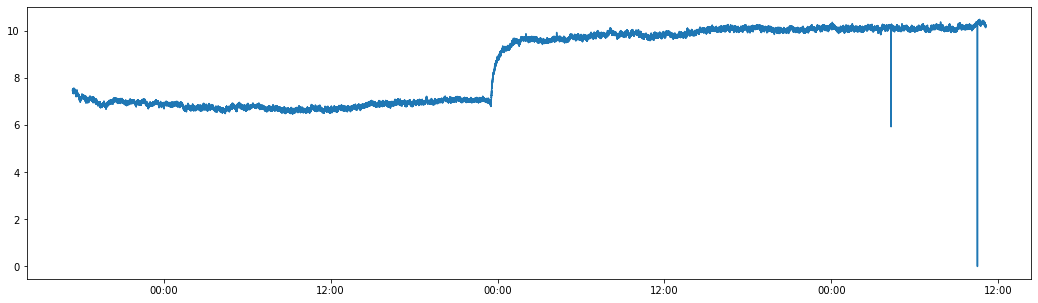

In [9]:
fig, ax = plt.subplots(figsize=(18,5)) 
ax.plot(time_pid, PID1)
fmt = mdates.DateFormatter('%H:%M') # Re-format the x-axis
ax.xaxis.set_major_formatter(fmt)

In [10]:
bf_folder = r'C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\CoSi\10nm\BlueFors_logs'

files_bf = os.listdir(bf_folder)
for i in range(len(files_bf)):
    if ".mph" in files_bf[i]: pass
    else: 
        print(r"[%d]" %(i), '----------->', files_bf[i]) 
        

[0] -----------> CH6 T 23-11-16.log
[1] -----------> CH6 T 23-11-17.log
[2] -----------> CH6 T 23-11-18.log
[3] -----------> CH6 T 23-11-19.log
[4] -----------> CH6 T 23-11-20.log
[5] -----------> Corr_overnight_17_11.png
[6] -----------> results.txt


In [41]:
t = np.array([])
time_bf =np.array([])

date_format = '%d-%m-%y %H:%M:%S'

for i in array([1,2,3,4]):
    file_bf = files_bf[i]
    file_pass_bf = bf_folder+"\\"+file_bf
    file1_bf = open(file_pass_bf, 'r')
    lines = file1_bf.readlines()
    file1_bf.close()


    for i in range(len(lines)): 
        arr = lines[i].split(',')
        time = arr[0][1:] + ' ' + arr[1]
        time_bf = np.append(time_bf, datetime.strptime(time, date_format))
        t = np.append(t, float(arr[2][:-1]))



(0.0, 0.06)

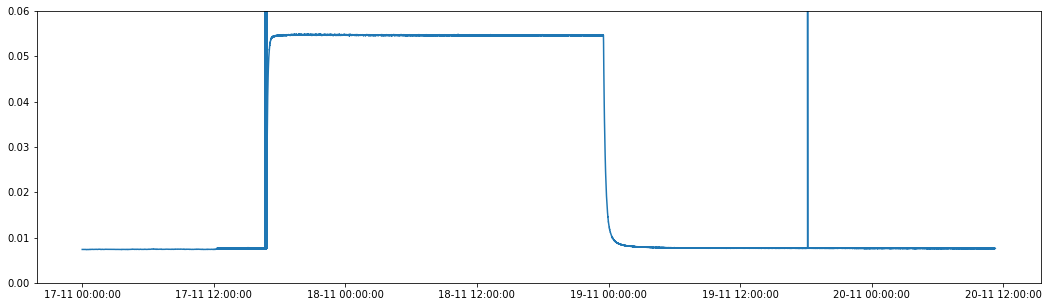

In [42]:
fig, ax = plt.subplots(figsize=(18,5)) 
ax.plot(time_bf, t)
fmt = mdates.DateFormatter('%d-%m %H:%M:%S') # Re-format the x-axis
ax.xaxis.set_major_formatter(fmt)
ax.set_ylim(0, 0.06)

In [43]:
start = time_pid[0]
def find_nearest(array, value):  # function to find boundaries for reference measurements
        array = np.asarray(array)
        idx = (np.abs(array - value)).argmin()
        return idx
    
start_index_bf = find_nearest(time_bf, start)

In [44]:
shifted_bf_time = time_bf[start_index_bf:]

global_time = np.array([])
pid = np.array([])
meas = np.array([])

temp = np.array([])
for i in range(len(shifted_bf_time)):
    curr = shifted_bf_time[i]
    global_time = np.append(global_time, curr)
    curr_idx = find_nearest(time_pid, curr)
    temp = np.append(temp, t[i])
    pid = np.append(pid, PID1[curr_idx])
    meas = np.append(meas, PV[curr_idx])
    
print(len(global_time), len(temp), len(pid))

pid_m = pid-np.mean(pid)
temp_m = temp-np.mean(temp)
meas_m = meas-np.mean(meas)

206522 206522 206522


In [84]:
%matplotlib qt
fig, ax = plt.subplots(figsize=(18,5)) 
stop = -100
ax.plot(global_time, abs(pid/max(abs(pid))))
fmt = mdates.DateFormatter('%d- %H:%M:%S') # Re-format the x-axis
ax.xaxis.set_major_formatter(fmt)
ax.set_ylim(0.5, 1)
ax.set_xlim(global_time[0], global_time[-1])

fig, ax = plt.subplots(figsize=(18,5)) 
stop = -100
ax.plot(global_time, temp)
fmt = mdates.DateFormatter('%d- %H:%M:%S') # Re-format the x-axis
ax.xaxis.set_major_formatter(fmt)
ax.set_ylim(0., 0.06)
ax.set_xlim(global_time[0], global_time[-1])


fig, ax = plt.subplots(figsize=(18,5)) 
stop = -100
ax.plot(global_time, meas)
fmt = mdates.DateFormatter('%d- %H:%M:%S') # Re-format the x-axis
ax.xaxis.set_major_formatter(fmt)
# ax.set_ylim(0., 0.06)
ax.set_xlim(global_time[0], global_time[-1])

(19678.726875, 19681.469699074074)

In [46]:
x = meas_m[:stop]
y = pid_m[:stop]
covariance = np.cov(x, y)
print(covariance)

sum(y*x)/np.sqrt(sum(y*y)*sum(x*x))

[[ 8.47872629e-05 -2.21147453e-04]
 [-2.21147453e-04  2.38812270e+00]]


-0.015541348763011815

In [47]:
x = temp_m[:stop]
y = pid_m[:stop]
covariance = np.cov(x, y)
print(covariance)

sum(y*x)/np.sqrt(sum(y*y)*sum(x*x))

[[ 3.79445891 -0.00709943]
 [-0.00709943  2.3881227 ]]


-0.0023584203188629638

In [48]:
x = temp_m[:stop] 
y = meas_m[:stop]
covariance = np.cov(x, y)
print(covariance)

sum(y*x)/np.sqrt(sum(y*y)*sum(x*x))

[[3.79445891e+00 3.87457024e-05]
 [3.87457024e-05 8.47872629e-05]]


0.0021601472501989296